In [31]:
import json
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input, Embedding, Dot, Reshape, Dense
from tensorflow.keras.models import Model

In [2]:
bizPATH = 'data/yelp_dataset/yelp_academic_dataset_business.json'
revPATH = 'data/yelp_dataset/yelp_academic_dataset_review.json'
userPATH = 'data/yelp_dataset/yelp_academic_dataset_user.json'
covidPATH = 'data/covid_19_dataset_2020_06_10/yelp_academic_dataset_covid_features.json'

In [54]:
file = open(userPATH)
data = json.loads(file.readline())
# file.close()

In [55]:
data = json.loads(file.readline())
data['user_id']

'FOBRPlBHa3WPHFB5qYDlVg'

In [51]:
cats = []
cat = 'bar'

with open(bizPATH, 'r') as infile:
        for line in infile:
            data = json.loads(line)
            if data['categories']:
                if cat.lower() in data['categories'].lower():
                    for label in data['categories'].lower().split(', '):
#                         if label not in cats:
                            cats.append(label)

In [33]:
np.squeeze(list(cats.value_counts().nlargest(25).keys()))

array(['restaurants', 'nightlife', 'bars', 'food',
       'american (traditional)', 'sushi bars', 'sports bars',
       'american (new)', 'beauty & spas', 'pubs', 'barbers',
       'juice bars & smoothies', 'barbeque', 'lounges', 'japanese',
       'cocktail bars', 'hair salons', 'wine bars', 'burgers',
       'arts & entertainment', 'breakfast & brunch', 'sandwiches',
       'event planning & services', 'beer', 'wine & spirits'],
      dtype='<U25')

In [4]:
cats = pd.DataFrame(cats, columns=['label'])

<AxesSubplot:>

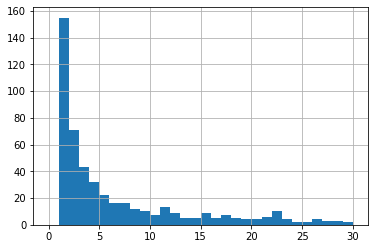

In [5]:
cats.value_counts().hist(range=(0, 30),bins=30)

In [32]:
np.squeeze(list(cats.value_counts().nlargest(25).keys()))

array(['restaurants', 'nightlife', 'bars', 'food',
       'american (traditional)', 'sushi bars', 'sports bars',
       'american (new)', 'beauty & spas', 'pubs', 'barbers',
       'juice bars & smoothies', 'barbeque', 'lounges', 'japanese',
       'cocktail bars', 'hair salons', 'wine bars', 'burgers',
       'arts & entertainment', 'breakfast & brunch', 'sandwiches',
       'event planning & services', 'beer', 'wine & spirits'],
      dtype='<U25')

In [46]:
cats.groupby('label').count()

""
label
acai bowls
accessories
accountants
acne treatment
active life
...
women's clothing
wraps
yelp events


In [56]:
# state

cats = []
cat = 'bar'

with open(bizPATH, 'r') as infile:
        for line in infile:
            data = json.loads(line)
#             if data['categories']:
#                 if cat.lower() in data['categories'].lower():
            cats.append(data['state'])

In [57]:
cats = pd.DataFrame(cats, columns=['label'])

In [65]:
cats.value_counts().nlargest(12)

label
AZ       60803
NV       39084
ON       36627
OH       16392
NC       16218
PA       12376
QC       10233
AB        8682
WI        5525
IL        2034
SC        1328
CA          23
dtype: int64

In [64]:
np.squeeze(list(cats.value_counts().nlargest(11).keys()))

array(['AZ', 'NV', 'ON', 'OH', 'NC', 'PA', 'QC', 'AB', 'WI', 'IL', 'SC'],
      dtype='<U2')

In [143]:
data = pd.read_json(bizPATH, lines=True)

In [146]:
data.head().T

,0,1,2,3,4
business_id,f9NumwFMBDn751xgFiRbNA,Yzvjg0SayhoZgCljUJRF9Q,XNoUzKckATkOD1hP6vghZg,6OAZjbxqM5ol29BuHsil3w,51M2Kk903DFYI6gnB5I6SQ
name,The Range At Lake Norman,"Carlos Santo, NMD",Felinus,Nevada House of Hose,USE MY GUY SERVICES LLC
address,10913 Bailey Rd,"8880 E Via Linda, Ste 107",3554 Rue Notre-Dame O,1015 Sharp Cir,4827 E Downing Cir
city,Cornelius,Scottsdale,Montreal,North Las Vegas,Mesa
state,NC,AZ,QC,NV,AZ
postal_code,28031,85258,H4C 1P4,89030,85205
latitude,35.462724,33.569404,45.479984,36.219728,33.428065
longitude,-80.852612,-111.890264,-73.580070,-115.127725,-111.726648
stars,3.500000,5.000000,5.000000,2.500000,4.500000
review_count,36,4,5,3,26


In [ ]:
data.hours.value_counts()

In [ ]:
userData = pd.read_json(userPATH, lines=True)

In [5]:
covidData = pd.read_json(covidPATH, lines=True)

In [7]:
covidData.head().T

,0,1,2,3,4
business_id,9kXRUIkwdDtnAPO6tVo51g,H6D5HOTfMjrZt7r1EObZ1g,FYddq7fUtzobZcw4jOJgVA,c75jLTjlgA9q3gImLEGT6w,YfzPiY50h_10Sjlg3mnNWQ
highlights,FALSE,FALSE,FALSE,FALSE,FALSE
delivery or takeout,FALSE,FALSE,FALSE,FALSE,FALSE
Grubhub enabled,FALSE,FALSE,FALSE,FALSE,FALSE
Call To Action enabled,FALSE,FALSE,FALSE,FALSE,FALSE
Request a Quote Enabled,FALSE,FALSE,FALSE,FALSE,FALSE
Covid Banner,FALSE,FALSE,FALSE,FALSE,FALSE
Temporary Closed Until,FALSE,FALSE,FALSE,FALSE,FALSE
Virtual Services Offered,FALSE,FALSE,FALSE,FALSE,FALSE


In [9]:
covidData.describe()

,business_id,highlights,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Covid Banner,Temporary Closed Until,Virtual Services Offered
count,209795,209795,209795,209795,209795,209795,209795,209795,209795
unique,209393,1038,2,2,2,2,6580,89,8
top,tNZ_zLPDiKRM4LYtra82ew,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
freq,4,202676,143564,191802,155728,207347,195569,208414,205573


In [28]:
(covidData.highlights.value_counts() == 10).sum()

13

In [27]:
covidData.groupby('highlights').filter(lambda x : len(x) == 10)

,business_id,highlights,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Covid Banner,Temporary Closed Until,Virtual Services Offered
941,2jrjVixxACWNOMmyUnMV5g,"[{""identifier"":""remote_services_during_covid_1...",FALSE,FALSE,TRUE,FALSE,"At Valley Child Care & Learning Center, our pr...",FALSE,FALSE
2077,9Rez1S1MdRJYnMnVU4YR2g,"[{""identifier"":""curbside_pickup_during_covid_1...",TRUE,FALSE,TRUE,FALSE,Curbside pick up now available at this locatio...,FALSE,FALSE
6430,IiVUoKDPWULbJOMfnHVrLQ,"[{""identifier"":""discounts_available"",""params"":...",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
9447,OHdKa4CQCLU11Qt9gMp2Ew,"[{""identifier"":""free_estimates"",""params"":{},""t...",FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
10918,V78f9CdEVTkKFkyhdTYVrQ,"[{""identifier"":""takeout_during_covid_19"",""para...",TRUE,FALSE,TRUE,FALSE,Pancake at your place with pick-up and deliver...,FALSE,FALSE
...,...,...,...,...,...,...,...,...,...
199299,ii0wGgrr589rYjwz7F1i3g,"[{""identifier"":""free_estimates"",""params"":{},""t...",FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
201362,v0Gwjj3hdaDiJ0i4Lr8KwA,"[{""identifier"":""curbside_pickup_during_covid_1...",TRUE,FALSE,TRUE,FALSE,Be Safe: At Home. For the latest information o...,FALSE,FALSE
204238,7lX4ssV7aASLVKUdYY85nQ,"[{""identifier"":""virtual_estimates_during_covid...",FALSE,FALSE,TRUE,FALSE,"We're Open! Store hours may vary, please call ...",FALSE,FALSE
204897,gapf3si69XZVKiaBilfwWQ,"[{""identifier"":""curbside_pickup_during_covid_1...",TRUE,FALSE,TRUE,FALSE,"Unfortunately our dining rooms are closed, but...",FALSE,FALSE


NameError: name 'revs' is not defined

In [35]:
topLabels = ['restaurants', 'nightlife', 'bars', 'food',
       'american (traditional)', 'sushi bars', 'sports bars',
       'american (new)', 'beauty & spas', 'pubs', 'barbers',
       'juice bars & smoothies', 'barbeque', 'lounges', 'japanese',
       'cocktail bars', 'hair salons', 'wine bars', 'burgers',
       'arts & entertainment', 'breakfast & brunch', 'sandwiches',
       'event planning & services', 'beer', 'wine & spirits']

topCities = ['Las Vegas', 'Toronto', 'Phoenix', 'Charlotte', 'Scottsdale',
       'Calgary', 'Pittsburgh', 'Montréal', 'Mesa', 'Henderson', 'Tempe',
       'Chandler', 'Cleveland', 'Glendale', 'Gilbert', 'Madison',
       'Mississauga', 'Peoria', 'Markham', 'North Las Vegas', 'Champaign',
       'North York', 'Scarborough', 'Surprise', 'Richmond Hill']

In [ ]:

def bizData(path=bizPATH, revs, topLabels=topLabels, topCities=topCities):
    
    
    with open(path, 'r') as infile:
        for i, line in enumerate(infile):

            data = json.loads(line)

            if data['business_id'] in bizDict:
                user_id = data['user_id']
                business_id = data['business_id']
                stars = data['stars']
                date = data['date']

                reviews.append([user_id, business_id, stars, date])

    
    
    

In [ ]:
def userData():
    
    